# **Feature Engineering**


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

### **Categorical Features**

In [28]:
data = [
{'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
{'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
{'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
{'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

In [29]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
d1  = vec.fit_transform(data)
d1

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [30]:
vec.get_feature_names_out()

array(['neighborhood=Fremont', 'neighborhood=Queen Anne',
       'neighborhood=Wallingford', 'price', 'rooms'], dtype=object)

In [31]:
fname = [s.split('=')[-1] for s in vec.get_feature_names_out()]
fname

['Fremont', 'Queen Anne', 'Wallingford', 'price', 'rooms']

In [32]:
vec = DictVectorizer(sparse=True, dtype=int)
d2  = vec.fit_transform(data)
d2

<4x5 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [33]:
df  = pd.DataFrame(d2.toarray(), columns=fname)
df

,Fremont,Queen Anne,Wallingford,price,rooms
0,0,1,0,850000,4
1,1,0,0,700000,3
2,0,0,1,650000,3
3,1,0,0,600000,2


### **Text Features**

In [ ]:
sample = ['problem of evil',
'evil queen',
'horizon problem']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
d3  = vec.fit_transform(sample)
d3

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [ ]:
df  = pd.DataFrame(d3.toarray(), columns=vec.get_feature_names_out())
df

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
d4  = vec.fit_transform(sample)
d4

<3x5 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [ ]:
df  = pd.DataFrame(d4.toarray(), columns=vec.get_feature_names_out())
df

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


### **Derived Features**

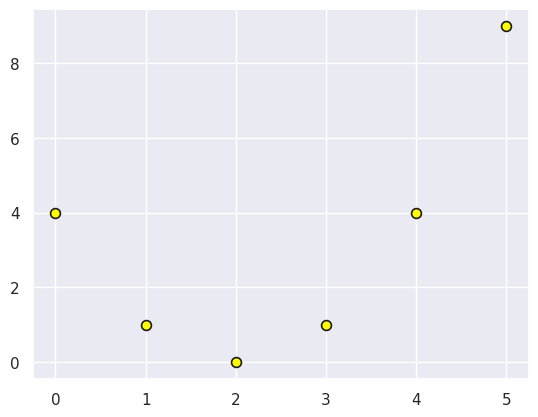

In [ ]:
x = np.linspace(0,5,6)
y = (x-2)**2

plt.scatter(x, y, s=50, ec='k', fc='yellow', lw=1.2)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

X = x[:,np.newaxis]
model.fit(X,y)

LinearRegression()

In [ ]:
Xtest = np.linspace(0,5,100)[:,np.newaxis]
ypred = model.predict(Xtest)

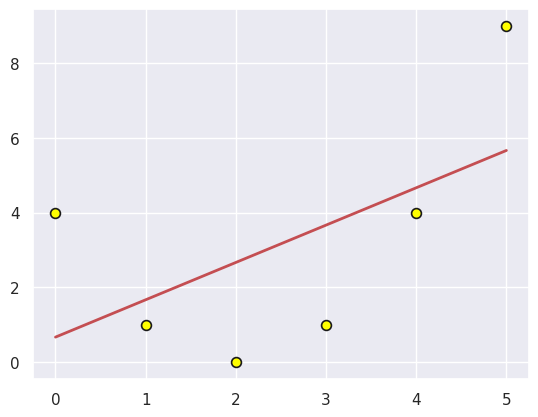

In [ ]:
plt.scatter(X.ravel(), y, s=50, ec='k', fc='yellow', lw=1.2)
plt.plot(Xtest.ravel(), ypred, '-r', lw=2.0)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly  = PolynomialFeatures(3)
X2    = poly.fit_transform(X)
X2

array([[  1.,   0.,   0.,   0.],
       [  1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.],
       [  1.,   4.,  16.,  64.],
       [  1.,   5.,  25., 125.]])

In [ ]:
model = LinearRegression(fit_intercept=True)
model.fit(X2, y)

LinearRegression()

In [ ]:
ypred = model.predict(X2)

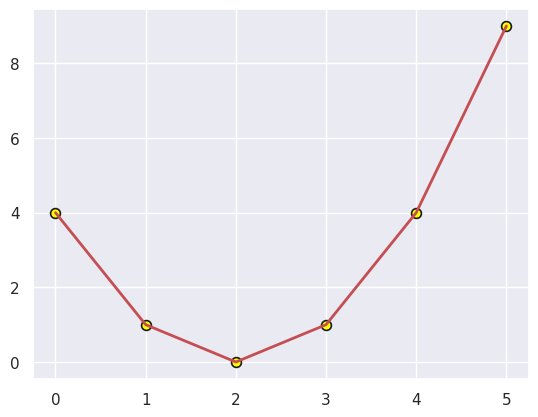

In [ ]:
plt.scatter(X.ravel(), y, s=50, ec='k', fc='yellow', lw=1.2)
plt.plot(X.ravel(), ypred, '-r', lw=2.0)

In [ ]:
X = np.array([[ np.nan, 0, 3 ],
[ 3, 7, 9 ],
[ 3, 5, 2 ],
[ 4, np.nan, 6 ],
[ 8, 8, 1 ]])
y = np.array([14, 16, -1, 8, -5])

### **Imputation of Missing Data**

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp.fit_transform(X)

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

### **Feature Pipelines**

In [ ]:
from sklearn.impute         import SimpleImputer
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model   import LinearRegression
from sklearn.pipeline       import make_pipeline

In [ ]:
model = make_pipeline(SimpleImputer(strategy='mean'),
                      PolynomialFeatures(2),
                      LinearRegression(fit_intercept=True))
model.fit(X,y)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [ ]:
ypred = model.predict(X)

In [ ]:
print(ypred);
print(y);

[14. 16. -1.  8. -5.]
[14 16 -1  8 -5]
